# [spaCy overview](http://spacy.io/docs/#examples)

## Load spaCy resources

In [1]:
# Import spacy and English models
import spacy

nlp = spacy.load('en')

## Process text

In [ ]:
# Process sentences 'Hello, world. Here are two sentences.' using spaCy

doc = nlp(u'Hello, world. Here are two sentences.')

## Get tokens and sentences

In [ ]:
# Get first token of the processed document
token = doc[0]
print(token)

print()
# Print sentences (one sentence per line)
for sent in doc.sents:
    print(sent)


## Part of speech tags

In [ ]:
# For each token, print corresponding part of speech tag
for token in doc:
    print('{} - {}'.format(token, token.pos_))

## Visual part of speech tagging ([displaCy](https://displacy.spacy.io))

## Syntactic dependencies

In [ ]:
# Write a function that walk up the syntactic tree of the given token and collects all tokens to the root token (including root token).
def tokens_to_root(token):
    '''Walk up the syntactic tree, collecting tokens to the root.'''
    tokens_to_r = []
    while token.head is not token:
        tokens_to_r.append(token)
        token = token.head
        
    tokens_to_r.append(token)
    return tokens_to_r

# For every token in document, print it's tokens to the root
for token in doc:
    print('{} --> {}'.format(token, tokens_to_root(token)))
    
print()
# Print dependency labels of the tokens
for token in doc:
    print('-> '.join(['{}-{}'.format(dependent_token, dependent_token.dep_) for dependent_token in tokens_to_root(token)]))
        

## Named entities

In [ ]:
# Print all named entities with named entity types

doc_2 = nlp("I went to Paris where I met my old friend Jack from uni.")
for ent in doc_2.ents:
    print('{} - {}'.format(ent, ent.label_))

## Noun chunks

In [ ]:
# Print noun chunks for doc_2

print([chunk for chunk in doc_2.noun_chunks])

## Word probabilities

In [ ]:
# For every token in doc_2, print log-probability of the word, estimated from counts from a large corpus 

for token in doc_2:
    print(token, ',', token.prob)

## Word embedding / Similarity

In [ ]:
# For a given document, caclulate similarity between 'apples' and 'oranges' and 'boots' amd 'hippos'
doc = nlp("Apples and oranges are similar. Boots and hippos aren't.")
apples = doc[0]
oranges = doc[2]
boots = doc[6]
hippos = doc[8]
print(apples.similarity(oranges))
print(boots.similarity(hippos))

print()
# Print similarity between sentence and word 'fruit'
apples_sent, boots_sent = doc.sents
fruit = doc.vocab['fruit']
print(apples_sent.similarity(fruit))
print(boots_sent.similarity(fruit))

In [ ]:
# Matplotlib Jupyter HACK
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Real text analysis

## Load text file

In [2]:
def read_file(file_name):
    with open(file_name, 'r') as file:
        return file.read()

## Process full text

In [ ]:
# Process `text` with Spacy NLP Parser
text = read_file('data/pride_and_prejudice.txt')
processed_text = nlp(text)

In [ ]:
# How many sentences are in Pride & Prejudice book?
sentences = [s for s in processed_text.sents]
print(len(sentences))

# Print sentences from index 10 to index 15, to make sure that we have parsed correct book
print(sentences[10:15])

## Find all the personal names

In [ ]:
# Extract all the personal names from Pride & Prejudice and count theirs occurences. 
# Expected output is a list in the following form: [('elizabeth', 622), ('darcy', 312), ('jane', 286), ('bennet', 266) ...].

from collections import Counter

actors = Counter()
for ent in processed_text.ents:
    if ent.label_ == 'PERSON':
        actors[ent.lemma_] += 1
        
print(actors.most_common(10))

## Plot actors personal names as a time series 

In [ ]:
# Plot actor mentions as a time series relative to the position of the actor's occurence in a book.

from collections import defaultdict

actors_occurences = defaultdict(list)
for ent in processed_text.ents:
    if ent.label_ == 'PERSON':
        actors_occurences[ent.lemma_].append(ent.start)

In [ ]:
from matplotlib.pyplot import hist

NUM_BINS = 10

def normalize_occurences(occurencies):
    return [o / float(len(terror_doc)) for o in occurencies]

elizabeth_occurences = normalize_occurences(actors_occurences['elizabeth'])
darcy_occurences = normalize_occurences(actors_occurences['darcy'])
bingly_occurences = normalize_occurences(actors_occurences['bingley'])

x = [elizabeth_occurences, darcy_occurences, bingly_occurences,]

with plt.style.context('fivethirtyeight'):
    n, bins, patches = plt.hist(x, NUM_BINS, histtype='bar', label=['Elizabeth', 'Darcy', 'Bingley'])
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)



In [ ]:
with plt.style.context('fivethirtyeight'):
    for a in n:
        plt.plot([x / (NUM_BINS - 1) for x in range(len(a))], a)

    plt.legend(['elizabeth', 'darcy', 'bingley'], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

## Spacy parse tree in action

In [ ]:
# Find words (adjectives) that describe Mr Darcy. 

# Solution #1
darcy_adjectives = []
for ent in processed_text.ents:
    if ent.lemma_ == 'darcy':
        for token in ent.subtree:
            if token.pos_ == 'ADJ':
                darcy_adjectives.append(token.lemma_)
print(darcy_adjectives)

print()
# Solution #2
# Definition of Adjectival modifier http://universaldependencies.org/en/dep/amod.html
print([token.lemma_ for ent in processed_text.ents if ent.lemma_ == 'darcy' for token in ent.subtree if token.dep_ == 'amod'])


In [ ]:
# Find actors that are 'talking', 'saying', 'doing' the most. Find the relationship between 
# entities and corresponding root verbs.
from collections import defaultdict, Counter

print(Counter([ent.lemma_ for ent in processed_text.ents if ent.label_ == 'PERSON' and ent.root.head.lemma_=='say']).most_common()) 


print()
# Find all the actors that got married in the book

# Some sentence from which information could be extracted
# 
# her mother was talking to that one person (Lady Lucas) freely,
# openly, and of nothing else but her expectation that Jane would soon
# be married to Mr. Bingley.
#
print(Counter([ent.lemma_ for ent in processed_text.ents if ent.label_ == 'PERSON' and ent.root.head.lemma_=='marry']).most_common()) 


## Extract Keywords

In [ ]:
# Extract Keywords using noun chunks from the news article (file 'article.txt').
# Spacy will pick some noun chunks that are not informative at all (e.g. we, what, who).
# Try to find a way to remove that kind of keywords.

article = read_file('data/article.txt')
doc = nlp(article)

keywords = Counter()
for chunk in doc.noun_chunks:
    if nlp.vocab[chunk.lemma_].prob < - 8: # probablity value -8 is arbitrarily selected threshold
        keywords[chunk.lemma_] += 1

keywords.most_common(20)

## Open task on the RAND Terrorism Dataset

We have preprocessed the [RAND Terrorism Dataset](http://www.rand.org/nsrd/projects/terrorism-incidents.html) for this task. 

Can you find out the following using the code you have written?

- Who are the persons mentioned in each article?
- What locations are mentioned in each article? Hint: a location just has a different label to a person
- From all of your entities, can you find out which named entities are terrorists from the syntactic relationships?
- With all of this information, can you plot a figure expressing the relationships between locations and terrorists?

In [5]:
# Read file
import matplotlib as mpl
import matplotlib.pyplot as plt

terror_file = read_file('data/rand-terrorism-dataset.txt')
terror_doc = nlp(terror_file)

In [6]:
def normalize_occurences(occurencies):
    return [o / float(len(terror_doc)) for o in occurencies]

In [7]:
# Get sentences
sentences = [s for s in terror_doc.sents]

print(sentences[1:5])

[DOMINICAN REPUBLIC.  , A homemade bomb was found behind books on the bookshelf in the USIS Lincoln Library in Santo Domingo.
, URUGUAY.  A Molotov cocktail was thrown outside the U.S. labor exhibit in Montevideo.  , Limited damage.
]


In [8]:
# Find persons and organisations mentioned in the text
from collections import Counter,defaultdict
persons = Counter()
for ent in terror_doc.ents:
    if ent.label_ == 'PERSON' or  ent.label_ == 'ORG':
        persons[ent.lemma_] += 1
print(persons.most_common(30))

[('taliban', 1828), ('farc', 976), ('hamas', 810), ('eta', 671), ('al - qaeda', 475), ('the communist party', 410), ('the revolutionary armed forces of colombia', 382), ('eln', 376), ('un', 285), ('fatah', 258), ('idf', 258), ('plo', 218), ('revolutionary armed forces of colombia', 211), ('bilad al - rafidayn', 202), ('army', 198), ('abu musab al - zarqawi', 177), ('ulfa', 172), ('islamic jihad', 167), ('nato', 160), ('milf', 155), ('pkk', 149), ('tnt', 146), ('the green zone', 145), ('saddam hussein', 143), ('the liberation tigers of tamil eelam', 142), ('ltte', 139), ('israel defense forces', 132), ('al qaeda', 126), ('uic', 123), ('the corsican national liberation front', 119)]


In [9]:
# Find locations mentioned in the text

locs = Counter()
for ent in terror_doc.ents:
    if ent.label_ == 'GPE':
        locs[ent.lemma_] += 1
print(locs.most_common(50))

[('iraq', 6904), ('baghdad', 5052), ('thailand', 3255), ('us', 1539), ('u.s.', 1264), ('kirkuk', 986), ('mosul', 924), ('israel', 690), ('baqubah', 624), ('afghanistan', 592), ('athens', 560), ('yala', 490), ('gaza', 488), ('narathiwat', 484), ('istanbul', 459), ('beirut', 442), ('paris', 419), ('basra', 380), ('jerusalem', 376), ('the gaza strip', 360), ('somalia', 329), ('pattani', 328), ('the united states', 317), ('sederot', 314), ('lebanon', 314), ('pakistan', 307), ('philippines', 283), ('france', 278), ('tikrit', 268), ('samarra', 267), ('kabul', 254), ('belfast', 254), ('rome', 236), ('london', 232), ('lima', 225), ('turkey', 216), ('india', 203), ('baiji', 199), ('iran', 199), ('kandahar', 195), ('fallujah', 195), ('madrid', 188), ('ashqelon', 181), ('karbala', 176), ('ethiopia', 170), ('the west bank', 169), ('santiago', 169), ('mogadishu', 169), ('karachi', 162), ('quetta', 157)]


In [10]:
# You might think that in order to extract the terrorists from the text and ignore the civilians,
# we could compare the word similariy with "terrorism" however below shows that results with this
# approach have a very low recall

terrorism_str = nlp('terrorists')[0]
terrorists = Counter()
for person in persons:
    person = nlp(person)[0]
    if person.similarity(terrorism_str) > 0.25:
        terrorists[person]+=1
print(terrorists.most_common(10))

IndexError: list index out of range

In [11]:
# An alternative approach (inspired by http://spacy.io/docs/tutorials/twitter-filter) is shown
# here. However if you run this you will see all sentences are classified as positive

from numpy import dot
from numpy.linalg import norm

def classify_sentence(sentence):
    def get_vector(word):
        return nlp.vocab[word].repvec
    
    def cos(v1,v2):
        return dot(v1,v2) / (norm(v1)*norm(v2))
  
    sen = [w.repvec for w in sentence]
    accept = map(get_vector,'Terrorists'.split())
    reject = map(get_vector,'Civilians'.split())
    
    y = sum(max(cos(w1,w2),0) for w1 in sen for w2 in accept)
    n = sum(max(cos(w1,w2),0) for w1 in sen for w2 in reject)
    
    if (y/(y+n)) >= 0.5 or True:
        return True
    else:
        return False

In [12]:
# Run sentence through classifier and print how many (of 30367) pass positive

count = 0
for sen in sentences:
    if classify_sentence(sen) is True:
        count+=1
print(count)

//anaconda/envs/pycon/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in float_scalars


120757


So we have shown two ways to distinguish terrorists from other persons in the text. Neither were successful. Maybe you can find a better way by analysing the syntactic dependencies?

### Plotting the number of terrorist incidents in a country over time

In [13]:
# Retrieve all the locations and store in a defaultdict object
locations = defaultdict(list)
for ent in terror_doc.ents:
    if ent.label_ == 'GPE':
        locations[ent.lemma_].append(ent.start)

In [14]:
# Using the same procedure as for Pride and Prejudice we can extract the occurrences of a place over time.
# For simplicity, commonly mentioned places inside a country and have been added to the country count
%matplotlib inline
NUM_BINS = 40

iraq_occurrences = normalize_occurences(locations['iraq']) \
    + normalize_occurences(locations['baghdad'])\
    + normalize_occurences(locations['kirkuk'])\
    + normalize_occurences(locations['mosul']) \
    + normalize_occurences(locations['baqubah']) 

thai_occurrences = normalize_occurences(locations['thailand']) \
    + normalize_occurences(locations['bangkok']) \
    + normalize_occurences(locations['narathiwat']) \
    + normalize_occurences(locations['pattani'])

us_occurrences = normalize_occurences(locations['us'])\
    + normalize_occurences(locations['u.s.'])
    
israel_occurrences = normalize_occurences(locations['israel']) \
    + normalize_occurences(locations['tel aviv']) \
    + normalize_occurences(locations['jerusalem'])
    
palestine_occurrences = normalize_occurences(locations['palestine']) \
    + normalize_occurences(locations['gaza'])

afg_occurrences = normalize_occurences(locations['afghanistan']) \
    + normalize_occurences(locations['kabul'])

lebanon_occurrences = normalize_occurences(locations['lebanon']) \
    + normalize_occurences(locations['beirut'])
    
turkey_occurrences = normalize_occurences(locations['turkey']) \
    + normalize_occurences(locations['istanbul']) \
    + normalize_occurences(locations['constantinople']) 

# Create labels and data list
label=['Iraq','Thailand','USA','Israel','Palestine','Afghanistan','Lebanon','Turkey']
x = [iraq_occurrences,
     thai_occurrences,
     us_occurrences,
     israel_occurrences,
     palestine_occurrences,
     afg_occurrences,
     lebanon_occurrences,
     turkey_occurrences]

'r'
'k'
'c'
'b'
'y'
'm'
'g'
'#54a1FF'


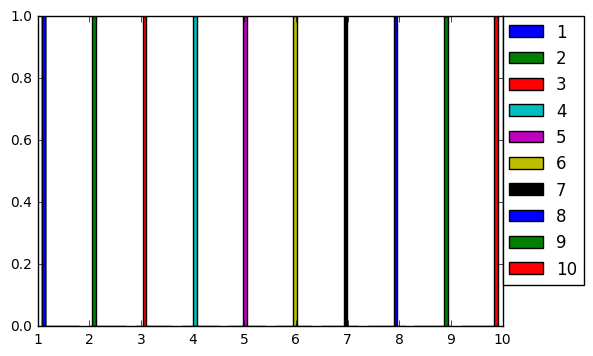

In [15]:
%matplotlib inline
x = [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]
label = ["1","2","3","4","5","6","7","8","9","10"]
NUM_BINS = 10
n, bins, patches = plt.hist(x, NUM_BINS, histtype='bar', label=label)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
mpl.cycler(color=['r','k','c','b','y','m','g','#54a1FF'])


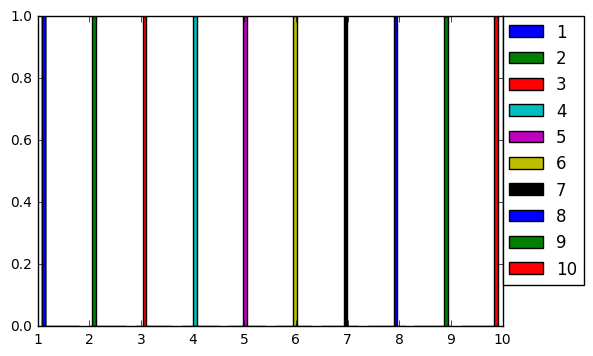

In [16]:
# It's now possible to plot the a histogram and line graph of incidents by country over time
# I've added additional features to change the default colour cycle of the plot
plt.figure()
n, bins, patches = plt.hist(x, NUM_BINS, histtype='bar', label=label)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['r','k','c','b','y','m','g','#54a1FF'])


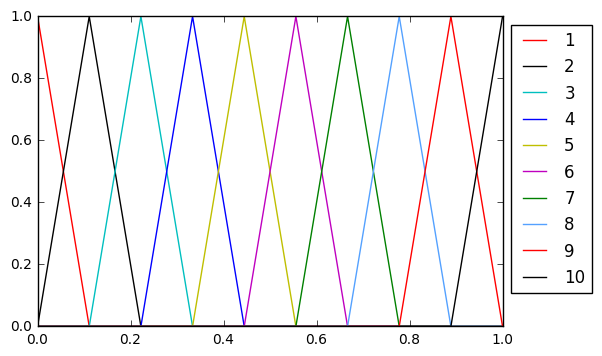

In [17]:
# A line graph is easier to interpret so transform the previous plot

plt.figure()
for a in n:
    x_val = [x/(NUM_BINS-1) for x in range(len(a))]
    plt.plot(x_val,a)
plt.legend(label,bbox_to_anchor=(1,1),loc=2)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['r','k','c','b','y','m','g','#54a1FF'])

## Plotting a relationship between terrorist group and location

In [18]:
# In order to determine which terrorists have been mentioned in conjuction with each country
# we need to build a new dictionary storing the number of mentions in an article of a country
# for each terrorist group we want to look at

# Specify the locations and terrorist groups we want to inspect
common_terr = ['taliban','al - qaeda','hamas','fatah','plo','bilad al - rafidayn']
common_locs = ['iraq','baghdad','kirkuk','mosul','afghanistan','kabul','basra','palestine','gaza','israel','istanbul','beirut','pakistan']
location_entity_dict = defaultdict(Counter)

with open('data/rand-terrorism-dataset.txt') as f:
    for line in f: #Read the file line by line
        article = nlp(line) #Run spaCy NLP extraction
        
        #Get all the groups and locations in the article
        article_ents = [ent.lemma_ for ent in article.ents if ent.label_ == 'PERSON' or ent.label_ == 'ORG']
        article_locs = [ent.lemma_ for ent in article.ents if ent.label_ =='GPE']

        #Filter groups and locations for only those which we are interested in
        ents_filtered = [ent for ent in article_ents if ent in common_terr]
        locs_filtered = [loc for loc in article_locs if loc in common_locs]
        
        #For each found entity and location, increment the dictionary entry
        for found_entity in ents_filtered:
            for found_location in locs_filtered:
                location_entity_dict[found_entity][found_location]+=1


In [19]:
import pandas as pd
# Transform the dictionary into a pandas DataFrame and fill NaN values with zeroes
df = pd.DataFrame.from_dict(dict(location_entity_dict),dtype=int)
df = df.fillna(value=0).astype(int)

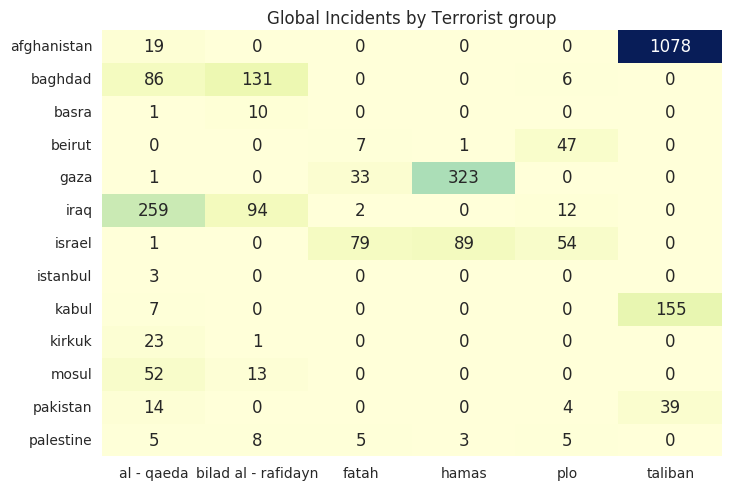

In [20]:
import seaborn as sns
# Seaborn can transform a DataFrame directly into a figure
plt.figure()
map = sns.heatmap(df,annot=True,fmt='d',cmap='YlGnBu',cbar=False)
plt.title('Global Incidents by Terrorist group')

#### Example output

![Heatmap of terrorist group and country](images/example_output.png)